In [1]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

In [2]:
# Artigo base:
# https://www.izhikevich.org/publications/spikes.pdf

In [3]:
vrest = 30			# potencial de repouso
dt = 0.1			# Passo da simulação 
temSim = 3000 		# Tempo total da simulação 3 segundos

In [4]:
a = 0.02
b = 0.2
c = -65
d = 2

In [5]:
v_a = np.zeros(temSim+1)
v_b = np.zeros(temSim+1)
v_e = np.zeros(temSim+1)

u_a = np.zeros(temSim+1)
u_b = np.zeros(temSim+1)
u_e = np.zeros(temSim+1)


v_a[0] = -65
u_a[0] = b*v_a[0]

v_b[0] = -65
u_b[0] = b*v_b[0]

v_e[0] = -65
u_e[0] = b*v_e[0]

## a) Implemente e simule o modelo acima por 3 segundos. Utilize o modelo de Hodgkin-Huxley com passo h=0,1 ms e Iinj=2 nA.

In [6]:
I_corrente = np.zeros(temSim+1);

for i in range(temSim+1):
    if i > 200 and i < 500:
        I_corrente[i] = 5
    if i > 800 and i < 1100:
        I_corrente[i] = 5
    if i > 1400 and i < 1700:
        I_corrente[i] = 5

In [7]:
for i in range(0, temSim-1):
	v_a[i+1] = v_a[i] + (0.04 * v_a[i]**2 + 5 * v_a[i] + 140 - u_a[i] + I_corrente[i])*dt
	u_a[i+1] = u_a[i] + (a* (b * v_a[i] - u_a[i])) * dt

	if v_a[i+1] > vrest:
		v_a[i+1] = c
		u_a[i+1] = u_a[i] + d

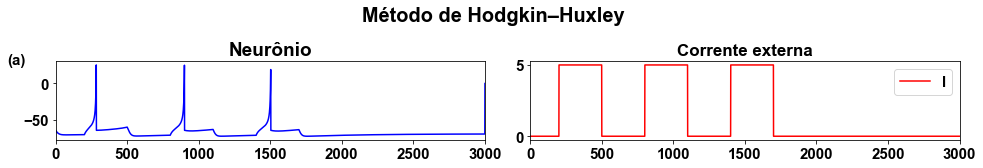

In [9]:
sizefonte = 15
font = {'family' : 'arial',
	'weight' : 'bold',
	'size'   : sizefonte}
plt.rc('font', **font)
fig = plt.figure(figsize=(13.50,8.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
					top=0.89, wspace=0.236, hspace=0.35)

fig.suptitle('Método de Hodgkin–Huxley', fontsize=sizefonte+5, weight="bold")
linhas = 5
colunas = 4
ax1 = plt.subplot2grid((linhas, colunas), (0, 0), colspan=2)
ax1.text(-0.07, 1.1, '(a)', transform=ax1.transAxes,
	  fontsize=sizefonte, fontweight='bold', va='top', ha='right')
ax1.set_title("Neurônio", fontname='Arial',size=sizefonte+4, weight="bold")
plt.plot(v_a, 'b')
plt.xlim(0,temSim)
# plt.xticks([])

ax2 = plt.subplot2grid((linhas, colunas), (0, 2), colspan=2)
ax2.set_title("Corrente externa", fontname='Arial',size=sizefonte+2, weight="bold")
plt.plot(I_corrente, 'r', label='I')
ax2.legend(loc='upper right')
# plt.plot(ts, v, 'b')
plt.xlim(0,temSim);

### Com a escolha dos parametros o neuronio não dispara. A corrente de entrada foi variara entre valores iguais a 5nA e igual a 0nA. O resultados é que sempre que esse valor é 5, há um disparo do neurônio.

##  b) A corrente de reobase é definida como a corrente abaixo da qual o neurônio não dispara. Construa uma simulação que permita verificar, experimentalmente, o valor da corrente de reobase para os parâmetros listados. Qual o valor desta corrente?

In [10]:
v_b = np.zeros(temSim+1)
v_b[0] = -65
u_b[0] = b*v_b[0]
contDisparosB = 0
spikesB = np.zeros(temSim+1)
alpha = np.linspace(0,5,num=temSim+1)

for i in range(0, temSim-1):
	v_b[i+1] = v_b[i] + (0.04 * v_b[i]**2 + 5 * v_b[i] + 140 - u_b[i] + I_corrente[i] * alpha[i])*dt
	u_b[i+1] = u_b[i] + (a* (b * v_b[i] - u_b[i])) * dt

	if v_a[i+1] > vrest:
		v_a[i+1] = c
		u_a[i+1] = u_a[i] + d

	if v_b[i+1] > vrest:
		contDisparosB+=1
		spikesB[i] = 1
		if contDisparosB == 1:
			print("Posião no tempo[{}] | Valor da corrente alpha [{}]".format(i,alpha[i]))
		v_b[i+1] = c
		u_b[i+1] = u_b[i] + d

Posião no tempo[509] | Valor da corrente alpha [0.8483333333333334]


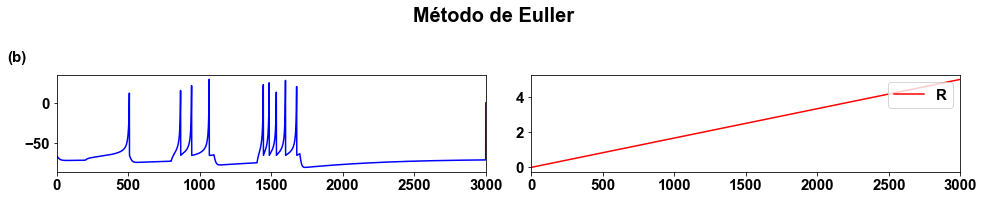

In [12]:
plt.rc('font', **font)
fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
fig.suptitle('Método de Euller', fontsize=sizefonte+5, weight="bold")
linhas = 5
colunas = 4
ax1 = plt.subplot2grid((linhas, colunas), (0, 0), colspan=2)
ax1.text(-0.07, 1.25, '(b)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')
plt.xlim(0,temSim)
plt.plot(v_b, 'b');

ax2 = plt.subplot2grid((linhas, colunas), (0, 2), colspan=2)
plt.plot(alpha, 'r', label='R')
ax2.legend(loc='upper right')
plt.xlim(0,temSim);

###### Se colocarmos uma corrente que vai aumentando progressivamente, partindo de 0 até 2 nA, o neurônio dispara no momento no tempo igual a 1.022 segundos. Se aumentarmos essa corrente, partindo de 0 até 5 nA, o neurônio dispara mais cedo no momento no tempo igual a 0.509 segundos. Causando mais disparos conforme o aumento da corrente

## c) O potencial de membrana do neurônio descrito depende do valor da corrente externa injetada. Construa o gráfico f x Iinj, em que f é a taxa de disparos do neurônio no período de simulação.

In [13]:
tam = 7
v_c = [np.zeros(temSim+1) for i in range(tam)]
u_c = [np.zeros(temSim+1) for i in range(tam)]
v_d = [np.zeros(temSim+1) for i in range(tam)]

v_I = [np.zeros(temSim+1) for i in range(tam)]
v_c_count = [0 for i in range(tam)]

for i in range(tam):
    v_c[i][0] = -65
    u_c[i][0] = b*v_c[i][0]
    
for i in range(temSim+1):
    v_I[0][i] = 5
    v_I[1][i] = 15
    v_I[2][i] = 25
    v_I[3][i] = 35
    v_I[4][i] = 45
    v_I[5][i] = 55
    v_I[6][i] = 65
    
for i in range(0, temSim-1):
    for j in range(len(v_c)):
        v_c[j][i+1] = v_c[j][i] + (0.04 * v_c[j][i]**2 + 5 * v_c[j][i] + 140 - u_c[j][i] + I_corrente[i] * v_I[j][i])*dt
        
        if v_c[j][i+1] > vrest:
            v_c[j][i+1] = c
            u_c[j][i+1] = u_c[j][i] + d
            v_c_count[j] +=1
            v_d[j][i] = 1

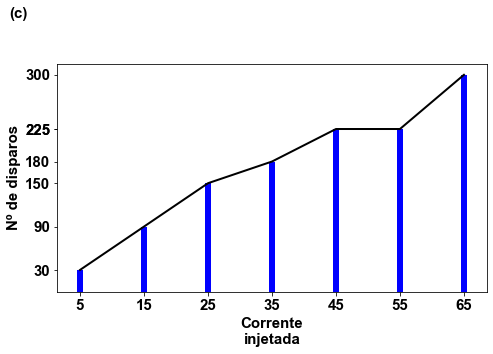

In [15]:
fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
ax1 = plt.subplot2grid((linhas, colunas), (2, 0), colspan=2, rowspan=2)
ax1.text(-0.07, 1.25, '(c)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')

injetValues = [v_I[0][0], v_I[1][0], v_I[2][0], v_I[3][0], v_I[4][0], v_I[5][0], v_I[6][0]]
plt.yticks(v_c_count)
plt.xticks(injetValues)
ax1.set_xlabel("Corrente\ninjetada", fontsize=sizefonte, fontweight='bold')
ax1.set_ylabel("Nº de disparos", fontsize=sizefonte, fontweight='bold')
plt.plot(injetValues, v_c_count, 'k', linewidth=2)
plt.bar(injetValues, v_c_count,  width=1, color='b');

### Conforme aumentamos a corrente de entrada, o valor de disparos aumenta também e de forma linear.

## d) Construa o histograma dos intervalos entre disparos para o neurônio descrito

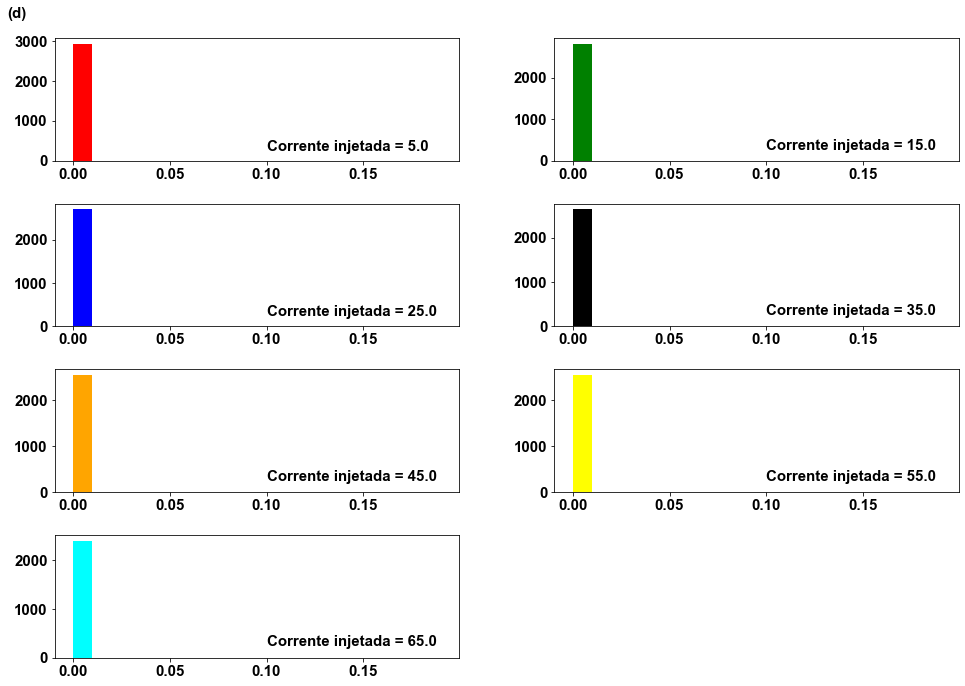

In [16]:
intervals = [np.zeros(temSim+1) for i in range(tam)]
for i in range(len(intervals)):
    intervals[i] = diff(v_d[i])
    intervals[i] = intervals[i][where(intervals[i] >= 0)]

bins = np.arange(0, .2, .01)

fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
colunas = 2
linhas = 4

ax1 = plt.subplot2grid((linhas, colunas), (0, 0))
ax1.text(-0.07, 1.25, '(d)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')
plt.hist(intervals[0], bins=bins, color='r')
ax1.annotate('Corrente injetada = {}'.format(injetValues[0]), xy=(.1, 200), xytext=(.1, 250))

ax2 = plt.subplot2grid((linhas, colunas), (0, 1))
plt.hist(intervals[1], bins=bins, color='g')
ax2.annotate('Corrente injetada = {}'.format(injetValues[1]), xy=(.1, 200), xytext=(.1, 250))

ax3 = plt.subplot2grid((linhas, colunas), (1, 0))
plt.hist(intervals[2], bins=bins, color='b')
ax3.annotate('Corrente injetada = {}'.format(injetValues[2]), xy=(.1, 200), xytext=(.1, 250))

ax4 = plt.subplot2grid((linhas, colunas), (1, 1))
plt.hist(intervals[3], bins=bins, color='k')
ax4.annotate('Corrente injetada = {}'.format(injetValues[3]), xy=(.1, 200), xytext=(.1, 250))

ax5 = plt.subplot2grid((linhas, colunas), (2, 0))
plt.hist(intervals[4], bins=bins, color='orange')
ax5.annotate('Corrente injetada = {}'.format(injetValues[4]), xy=(.1, 200), xytext=(.1, 250))

ax6 = plt.subplot2grid((linhas, colunas), (2, 1))
plt.hist(intervals[5], bins=bins, color='yellow')
ax6.annotate('Corrente injetada = {}'.format(injetValues[5]), xy=(.1, 200), xytext=(.1, 250))

ax7 = plt.subplot2grid((linhas, colunas), (3, 0))
ax7.annotate('Corrente injetada = {}'.format(injetValues[6]), xy=(.1, 200), xytext=(.1, 250))
plt.hist(intervals[6], bins=bins, color='cyan');

### Como o intervalo de tempo entre os disparos se mantem constante, é natural que e o histograma mostre apenas uma barra no gráfico.

## e) Repita os itens c e d, porém considere agora que Iinj possui amplitude de 2 nA e sofre a influência de um ruído. Avalie a influência de diferentes magnitudes de ruído. 

In [17]:
tam = 7
v_e = [np.zeros(temSim+1) for i in range(tam)]
u_e = [np.zeros(temSim+1) for i in range(tam)]

v_I = [np.zeros(temSim+1) for i in range(tam)]
ruido = [np.zeros(temSim+1) for i in range(tam)]
spikes = [np.zeros(temSim+1) for i in range(tam)]
v_e_count = [0 for i in range(tam)]

for i in range(tam):
    v_e[i][0] = -65
    u_e[i][0] = b*v_e[i][0]
    
for i in range(temSim+1):
    v_I[0][i] = 5
    v_I[1][i] = 15
    v_I[2][i] = 25
    v_I[3][i] = 35
    v_I[4][i] = 45
    v_I[5][i] = 55
    v_I[6][i] = 65
    
np.random.seed(1145)
# 0 é a média da distribuição normal | 1 is the standard deviation of the normal distribution | temSim+1 tamanho do ruido
ruido[0] = np.random.normal(0, 5, temSim+1)
ruido[1] = np.random.normal(0, 10, temSim+1)
ruido[2] = np.random.normal(0, 13, temSim+1)
ruido[3] = np.random.normal(0, 15, temSim+1)
ruido[4] = np.random.normal(0, 18, temSim+1)
ruido[5] = np.random.normal(0, 20, temSim+1)
ruido[6] = np.random.normal(0, 23, temSim+1)

for i in range(0, temSim-1):
    for j in range(len(v_c)):
        v_e[j][i+1] = v_e[j][i] + (0.04 * v_e[j][i]**2 + 5 * v_e[j][i] + 140 - u_e[j][i] + I_corrente[i] * v_I[j][i] * ruido[j][i])*dt
        
        if v_e[j][i+1] > vrest:
            v_e[j][i+1] = c
            u_e[j][i+1] = u_e[j][i] + d
            v_e_count[j] +=1
            spikes[j][i] = 1

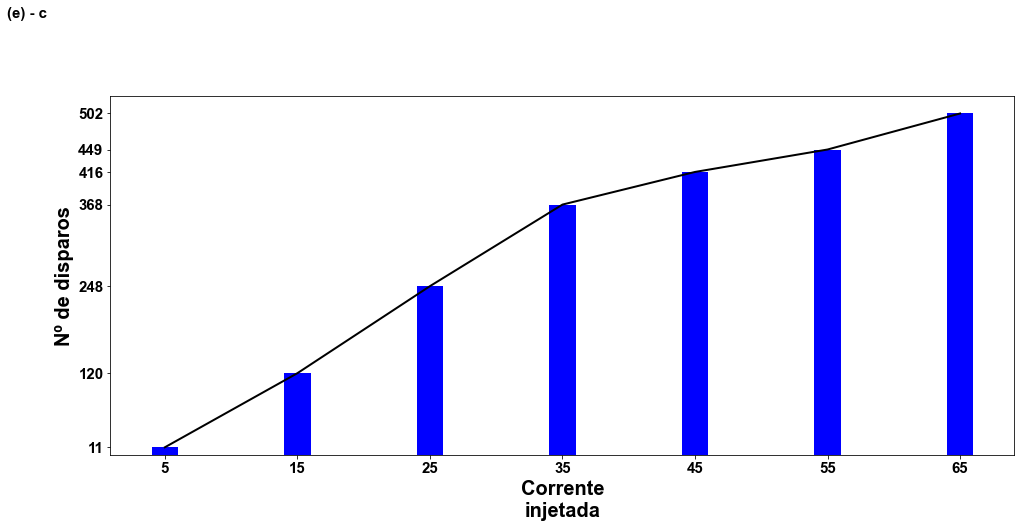

In [18]:
fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
colunas = 3
linhas = 5
ax1 = plt.subplot2grid((linhas, colunas), (2, 0), colspan=3, rowspan=5)
ax1.text(-0.07, 1.25, '(e) - c', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')

injetValues = [v_I[0][0], v_I[1][0], v_I[2][0], v_I[3][0], v_I[4][0], v_I[5][0], v_I[6][0]]
plt.yticks(v_e_count)
plt.xticks(injetValues)
ax1.set_xlabel("Corrente\ninjetada", fontsize=sizefonte+5, fontweight='bold')
ax1.set_ylabel("Nº de disparos", fontsize=sizefonte+5, fontweight='bold')
plt.plot(injetValues, v_e_count, 'k', linewidth=2)
plt.bar(injetValues, v_e_count,  width=2, color='b');

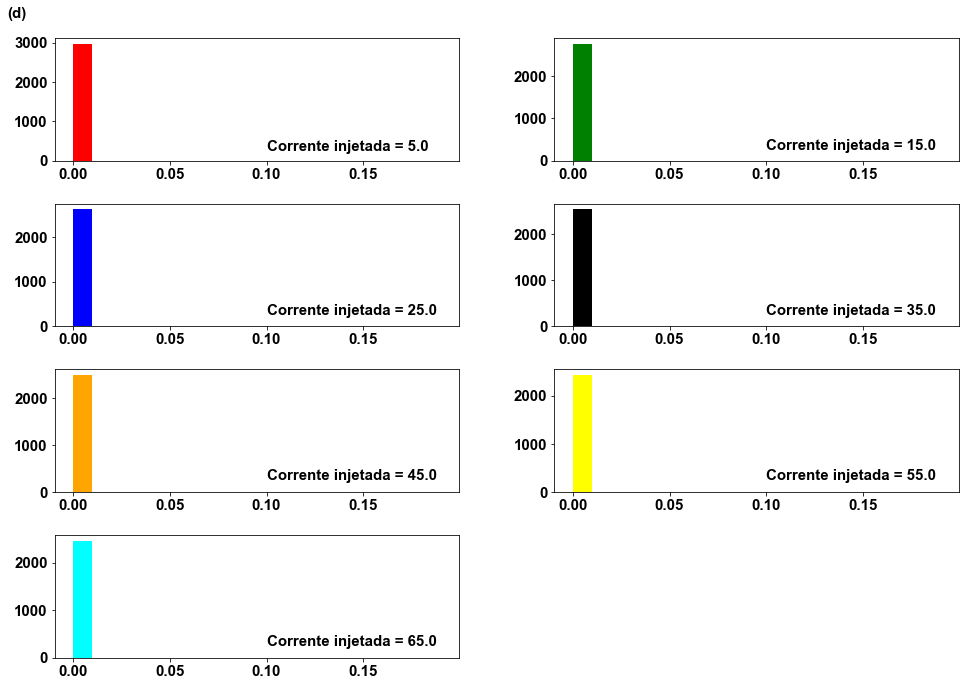

In [20]:
intervals = [np.zeros(temSim+1) for i in range(tam)]
for i in range(len(spikes)):
    intervals[i] = diff(spikes[i])
    intervals[i] = intervals[i][where(intervals[i] >= 0)]

bins = np.arange(0, .2, .01)

fig = plt.figure(figsize=(13.50,10.50))
fig.subplots_adjust(left=0.05, bottom=0.07, right=0.98,
                    top=0.89, wspace=0.236, hspace=0.35)
colunas = 2
linhas = 4

ax1 = plt.subplot2grid((linhas, colunas), (0, 0))
ax1.text(-0.07, 1.25, '(d)', transform=ax1.transAxes,
      fontsize=sizefonte, fontweight='bold', va='top', ha='right')
plt.hist(intervals[0], bins=bins, color='r')
ax1.annotate('Corrente injetada = {}'.format(injetValues[0]), xy=(.1, 200), xytext=(.1, 250))

ax2 = plt.subplot2grid((linhas, colunas), (0, 1))
plt.hist(intervals[1], bins=bins, color='g')
ax2.annotate('Corrente injetada = {}'.format(injetValues[1]), xy=(.1, 200), xytext=(.1, 250))

ax3 = plt.subplot2grid((linhas, colunas), (1, 0))
plt.hist(intervals[2], bins=bins, color='b')
ax3.annotate('Corrente injetada = {}'.format(injetValues[2]), xy=(.1, 200), xytext=(.1, 250))

ax4 = plt.subplot2grid((linhas, colunas), (1, 1))
plt.hist(intervals[3], bins=bins, color='k')
ax4.annotate('Corrente injetada = {}'.format(injetValues[3]), xy=(.1, 200), xytext=(.1, 250))

ax5 = plt.subplot2grid((linhas, colunas), (2, 0))
plt.hist(intervals[4], bins=bins, color='orange')
ax5.annotate('Corrente injetada = {}'.format(injetValues[4]), xy=(.1, 200), xytext=(.1, 250))

ax6 = plt.subplot2grid((linhas, colunas), (2, 1))
plt.hist(intervals[5], bins=bins, color='yellow')
ax6.annotate('Corrente injetada = {}'.format(injetValues[5]), xy=(.1, 200), xytext=(.1, 250))

ax7 = plt.subplot2grid((linhas, colunas), (3, 0))
ax7.annotate('Corrente injetada = {}'.format(injetValues[6]), xy=(.1, 200), xytext=(.1, 250))
plt.hist(intervals[6], bins=bins, color='cyan');

### Não sei porque o histograma se mantem assim mesmo depois deu modificar e explocar os bins do histograma